# Entry 42 - Logistic Regression

Page 143 of [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646) states that Logistic Regression is "just like a Linear Regression model" except that "instead of outputting the result directly like the Linear Regression model does, it outputs the *logistic* of this result."

## Learning Style

<table align='left'>
    <tr>
        <th>Supervision</th>
        <th>Prediction types</th>
    </tr>
    <tr>
        <td>Supervised</td>
        <td>Classification</td>
    </tr>
</table>

## Description

Logistic Regression adds a sigmoid function to linear regression, which allow it to make classification predictions. I covered the linear regression equations in Entry 35, but as a reminder:

$\hat{y} = h_{0}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \dotsb + \theta_{n}x_{n} = \theta^{T} x$

Where

- $h_{\theta}$: prediction function, also called a *hypothesis*; $h_{\theta} = \theta^{T}x^{(i)}$
- $\theta$: vector (I.E., list) of weights, with the first value being the y-intercept type value (represented by *b* in *Introduction to Machine Learning*)
- $x$: the matrix of feature values (I.E., the DataFrame) with the first column ($x_{0}$, not listed in the equation) being all 1s so that $\theta_{0}$ is always evaluated as the same value

The addition of the sigmoid function turns the output into a number between 0 and 1, where the predictions form an S-shape.

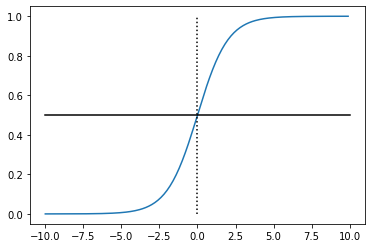

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 

t = list(np.arange(-10, 10, 0.1))
sig = [(1 / (1 + math.exp(-x))) for x in t]

plt.plot(t, sig)
plt.plot([-10, 10], [0.5, 0.5], "k-")
plt.plot([0, 0], [0, 1], "k:")

Page 143 of Hands-On Machine Learning spells out the importance of this on page 143. The output is "the probability $\hat{p} = h_{\theta}(x)$ that an instance $x$ belongs to the positive class." From there, it's easy to turn into a classification prediction:

$\hat{y} = 
\begin{cases}
    0 \text{ if } \hat{p} < 0.5\\
    1 \text{ if } \hat{p} \geq 0.5
  \end{cases}$
  
The above assumes that the desired threshold is 0.5. I covered choosing thresholds in Entry 26. In Logistic Regression, the threshold is also called the "decision boundary" because the threshold marks the boundary between a "yes" or "no" decision.

## Purpose

The purpose of Logistic Regression is to apply the same mathematical principles as Linear Regression to classification problems.

To make the linear regression equation into a logistic regression equation, a sigmoid function is added:

$h_{0}(x) = g(\theta^{T}x) = g(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-\theta^{T}x}}$

Where:
- $z = X \theta = \theta^{T}x$
  - (m x n) x (n x 1 ) = (m x 1)
- e = Euler's number (i.e., the base of natural logarithm)
  - The exact value is in the `math` library: `math.e`
  - To use it in this equation, `math.exp(-z)`
- g = sigmoid function

The above equations came from week 3 of Andrew Ng's [Machine Learning course](https://www.coursera.org/learn/machine-learning).

## Behavior

Because Logistic Regression is essentially Linear Regression with a sigmoid function, it behaves very similarily to Linear Regression.

These similarities include:
- The classes are separated by a line, plane or hyperplane (The Behavior section of Entry 35 has illustrations of this concept)
- Regularization can be applied ([Scikit' LogisticRegression function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) applies L2 regularization by default. I cover L1 and L2 regularization in Entry 38)
- Gradient Descent is used to find the global minimum (I cover Gradient Descent in Entry 37b)

On page 144 of *Hands-On Machine Learning with Scikit Learn*, Aurelien points out a notable exception to the simiarities: Logistic Regression has no equivalent to the Normal Equation (I cover Normal Equation in Entry 37a). Gradient Descent is the method used to determine the cost function and find the best fit to the data.

[Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413) also warns on page 58 that:

> `LogisticRegression` is a classification algorithm and not a regression algorithm, and it should not be confused with `LinearRegression`.

### Multiple Classes

On page 148 of *Hands-On Machine Learning with Scikit Learn*, Aurelien discusses using Logistic Regression to predict on multiple classes (I.E. more than binary "yes"/"no" decisions) using Softmax Regression.

As I don't work much with multi-class predictions, I will be skipping Softmax. 

## Parameters

Scikit Learn has 15 parameters, all of which have default parameters.

- penalty='l2'
- dual=False
- tol=0.0001
- C=1.0
- fit_intercept=True
- intercept_scaling=1
- class_weight=None
- random_state=None
- solver='lbfgs'
- max_iter=100
- multi_class='auto'
- verbose=0
- warm_start=False
- n_jobs=None
- l1_ratio=None

The full descriptions of what each does is available on the Scikit Learn [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) page, but I want to call out two here.

As mentioned above in the Behavior section, L2 regularization is applied by default. *Introduction to Machine Learning with Python* points out on page 64 that this can be changed to L1 regularization if a more interpretable model is desired, as it uses fewer features (L1 and L2 regularization are covered in Entry 38).

The second parameter is `C`. Both *Hands-On Machine Learning with Scikit Learn* and *Introduction to Machine Learning with Python* spend several paragraphs talking about this parameter. It controls the amount of regularzation. The important thing to remember about `C` is that it the **inverse** of regularization strength. Higher values of `C` produce *less* regularization. As such, if the model needs *more* regularization, start using decimal values like 0.01.

## Strengths

- Fast to train
- Fast to predict
- Easily scale to very large datasets
  - On page 263 [Machine Learning with Python Cookbook](https://www.amazon.com/Machine-Learning-Python-Cookbook-Preprocessing/dp/1491989386) discusses using the stochastic average gradient (SAG) solver on large datasets
  - The large dataset discussion includes a warning that SAG is very sensitive to feature scaling, so standardizing the features is extrememly important
- Work well with sparse data
- Easy to intrepret / easy to see feature importance
- Performs well when the number of features is large compared to the number of observations (ex, 104 features but only 5 observations)
- Handles imbalanced classes using the `class_weight` parameter (I discuss imbalanced classes in Entry 23)

## Limitations

- In low dimensions, linear models appear to have very limited usefulness. However, as more dimensions are added, the model becomes more powerful and can become overfit
- Often unclear why coefficients are the what they are, particularly if there are highly correlated features
- Specializes in linear relationships
  - While features can be augmented to help capture curvilinear relationships (like quadratic or cubic), Linear Regression may not adequately capture nonlinear relationships
  - Adding additional features to augment curvilinear relationships can create or exacerbate model overfitting
- As it uses the mean of the residuals, it is susceptible to outliers
- May become erratic when the number of predictors is higher than the number of observations (ex, 14 features but only 5 observations)

## Up Next


## Resources

- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
- [Machine Learning](https://www.coursera.org/learn/machine-learning) coursera course by Andrew Ng
- [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)
- [Machine Learning with Python Cookbook](https://www.amazon.com/Machine-Learning-Python-Cookbook-Preprocessing/dp/1491989386)